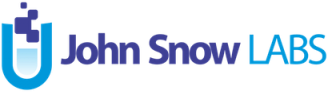

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/PerformanceTest_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest on John Snow Labs

In [ ]:
!pip install langtest[transformers]

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

# Performance Testing

In this section, we dive into testing of time taken to complete the tests in LangTest on the datasets with Models.

### Setup and Configure Harness

In [3]:
harness = Harness(task="ner", model={"model": "dslim/bert-base-NER", "hub": "huggingface"})

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


We have specified task as `ner` , hub as `huggingface` and model as `dslim/bert-base-NER`



For tests we used lowercase and uppercase. Other available robustness tests are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`

Bias tests:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`


Representation tests:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Accuracy tests:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Fairness tests:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`


In [4]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'lowercase': {'min_pass_rate': 0.66},
                          'uppercase': {'min_pass_rate': 0.66},
                        },
            'performance':{
                'speed': {'min_pass_rate': 100, 'unit': 'token/sec'}
            },
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'lowercase': {'min_pass_rate': 0.66},
   'uppercase': {'min_pass_rate': 0.66}},
  'performance': {'speed': {'min_pass_rate': 100, 'unit': 'token/sec'}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'lowercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'uppercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

### Generating the test cases.

In [5]:
harness._testcases = None

In [6]:
harness.generate()

Generating testcases...: 100%|██████████| 2/2 [00:00<00:00, 2659.67it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [7]:
harness.testcases()

category  test_type  \
0     robustness  lowercase   
1     robustness  lowercase   
2     robustness  lowercase   
3     robustness  lowercase   
4     robustness  lowercase   
..           ...        ...   
448   robustness  uppercase   
449   robustness  uppercase   
450   robustness  uppercase   
451   robustness  uppercase   
452  performance      speed   

                                              original  \
0    SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...   
1                                          Nadim Ladki   
2             AL-AIN , United Arab Emirates 1996-12-06   
3    Japan began the defence of their Asian Cup tit...   
4    But China saw their luck desert them in the se...   
..                                                 ...   
448     CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .   
449                                      Robert Galvin   
450                               MELBOURNE 1996-12-06   
451  Australia gave Brian Lara another reason to be...   
452                                                  -   

                                             test_case  
0    soccer - japan get lucky win , china in surpri...  
1                                          nadim ladki  
2             al-ain , united arab emirates 1996-12-06  
3    japan began the defence of their asian cup tit...  
4    but china saw their luck desert them in the se...  
..                                                 ...  
448     CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .  
449                                      ROBERT GALVIN  
450                               MELBOURNE 1996-12-06  
451  AUSTRALIA GAVE BRIAN LARA ANOTHER REASON TO BE...  
452                                                  -  

[453 rows x 4 columns]

harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [8]:
harness.run()

Running testcases... : 100%|██████████| 453/453 [02:43<00:00,  2.77it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [9]:
harness.generated_results()

category  test_type  \
0     robustness  lowercase   
1     robustness  lowercase   
2     robustness  lowercase   
3     robustness  lowercase   
4     robustness  lowercase   
..           ...        ...   
448   robustness  uppercase   
449   robustness  uppercase   
450   robustness  uppercase   
451   robustness  uppercase   
452  performance      speed   

                                              original  \
0    SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...   
1                                          Nadim Ladki   
2             AL-AIN , United Arab Emirates 1996-12-06   
3    Japan began the defence of their Asian Cup tit...   
4    But China saw their luck desert them in the se...   
..                                                 ...   
448     CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .   
449                                      Robert Galvin   
450                               MELBOURNE 1996-12-06   
451  Australia gave Brian Lara another reason to be...   
452                                                  -   

                                             test_case  \
0    soccer - japan get lucky win , china in surpri...   
1                                          nadim ladki   
2             al-ain , united arab emirates 1996-12-06   
3    japan began the defence of their asian cup tit...   
4    but china saw their luck desert them in the se...   
..                                                 ...   
448     CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .   
449                                      ROBERT GALVIN   
450                               MELBOURNE 1996-12-06   
451  AUSTRALIA GAVE BRIAN LARA ANOTHER REASON TO BE...   
452                                                  -   

                                       expected_result  \
0                  JAPAN: MISC, LUCKY: PER, CHINA: ORG   
1                                     Nadim Ladki: PER   
2               AL-AIN: LOC, United Arab Emirates: LOC   
3    Japan: LOC, Asian Cup: MISC, Syria: LOC, Group...   
4                          China: LOC, Uzbekistan: LOC   
..                                                 ...   
448                          LARA: LOC, MISERABLE: PER   
449                                 Robert Galvin: PER   
450                                     MELBOURNE: LOC   
451  Australia: LOC, Brian Lara: PER, West Indies: ...   
452                                      100 token/sec   

                                         actual_result   pass  
0                                                       False  
1                                                       False  
2                                          al-ain: LOC  False  
3                               japan: ORG, syria: ORG  False  
4                                      uzbekistan: LOC  False  
..                                                 ...    ...  
448                          LARA: LOC, MISERABLE: PER   True  
449                           ROBERT: ORG, GALVIN: PER  False  
450                                     MELBOURNE: LOC   True  
451  AUSTRALIA: LOC, BRIAN LARA: LOC, REASON: PER, ...  False  
452                                    19.20 token/sec   True  

[453 rows x 7 columns]

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

To get time_elapsed for each test we pass parameter `return_runtime=True` in `.report()` method. We can also select the unit for time_elapsed i.e, seconds(s), miliseconds(ms) or microseconds(us) etc.

In [10]:
harness.report()

category  test_type  fail_count  pass_count pass_rate minimum_pass_rate  \
0   robustness  lowercase         182          44       19%               66%   
1   robustness  uppercase         152          74       33%               66%   
2  performance      speed           0           1      100%              100%   

    pass  
0  False  
1  False  
2   True

# Multiple Models Runtime Testing

In [ ]:
!pip install spacy johnsnowlabs

In [11]:
model_dict=[{"model": "ner.dl", "hub": "johnsnowlabs"},
        {"model": "en_core_web_sm", "hub": "spacy"}]

In [13]:
# Load CoNLL
!wget https://github.com/JohnSnowLabs/langtest/raw/main/langtest/data/conll/sample.conll

--2023-08-18 07:33:45--  https://github.com/JohnSnowLabs/langtest/raw/main/langtest/data/conll/sample.conll
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/langtest/data/conll/sample.conll [following]
--2023-08-18 07:33:45--  https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/langtest/data/conll/sample.conll
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50519 (49K) [text/plain]
Saving to: ‘sample.conll’

sample.conll        100%[===================>]  49.33K  --.-KB/s    in 0.01s   

2023-08-18 07:33:46 (3.77 MB/s) - ‘sample.conll’ saved [50519/50519]



In [16]:
harness = Harness(task="ner", model=model_dict, data={"data_source":"sample.conll"})

recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]
Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


In [17]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase': {'min_pass_rate': 0.60},
            },
            'performance': {'speed': {'min_pass_rate': 100, 'unit': 'tokens/sec'}
            },
          }
 }
 )


{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}},
  'performance': {'speed': {'min_pass_rate': 100, 'unit': 'tokens/sec'}}}}

In [18]:
harness.generate().run()

Running testcases... : 100%|██████████| 453/453 [00:11<00:00, 40.56it/s]


In [19]:
harness.report()